In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

ogrenciler = pd.read_csv('StudentsPerformance.csv')
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
# Ödev 1
ogrenciler.groupby("cinsiyet").mean()

,matematik_notu,okuma_notu,yazma_notu
cinsiyet,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


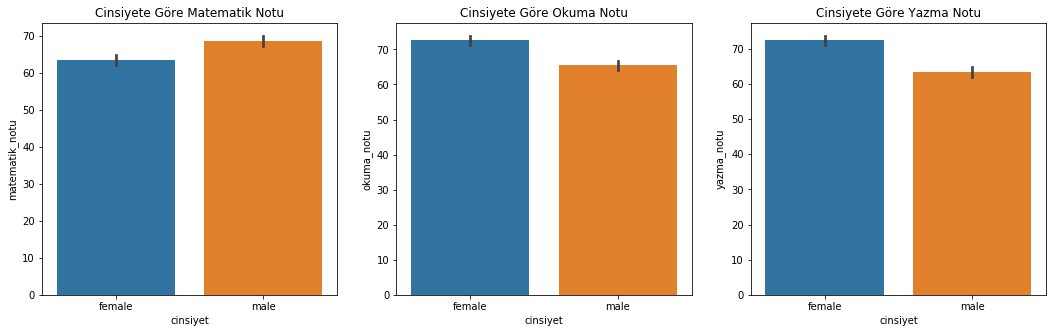

In [32]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("Cinsiyete Göre Matematik Notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["okuma_notu"])
plt.title("Cinsiyete Göre Okuma Notu")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["yazma_notu"])
plt.title("Cinsiyete Göre Yazma Notu")

plt.show()

In [34]:
dereceler = ogrenciler["cinsiyet"].unique()
grup_ogrenciler = ogrenciler.groupby("cinsiyet")

pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["cinsiyet"]==dereceler[i]][var], 
                                ogrenciler[ogrenciler["cinsiyet"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.383245869828983,0.000000091201855


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,7.959308005187657,0.000000000000005


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,9.979557910004507,0.000000000000000


In [35]:
ogrenciler.groupby("koken").mean()

,matematik_notu,okuma_notu,yazma_notu
koken,,,
group A,61.629213483146067,64.674157303370791,62.674157303370784
group B,63.452631578947368,67.352631578947367,65.599999999999994
group C,64.463949843260181,69.103448275862064,67.827586206896555
group D,67.362595419847324,70.030534351145036,70.145038167938935
group E,73.821428571428569,73.028571428571425,71.407142857142858


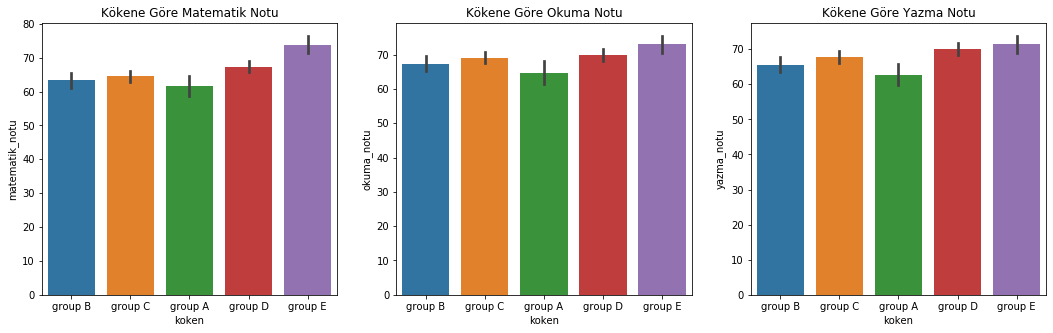

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("Kökene Göre Matematik Notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["okuma_notu"])
plt.title("Kökene Göre Okuma Notu")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["koken"], ogrenciler["yazma_notu"])
plt.title("Kökene Göre Yazma Notu")

plt.show()

In [37]:
dereceler = ogrenciler["koken"].unique()
grup_ogrenciler = ogrenciler.groupby("koken")

pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["koken"]==dereceler[i]][var], 
                                ogrenciler[ogrenciler["koken"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


In [39]:
# Ödev 2

ogrenciler.groupby("ogle_yemegi").mean()

,matematik_notu,okuma_notu,yazma_notu
ogle_yemegi,,,
free/reduced,58.921126760563382,64.653521126760566,63.022535211267609
standard,70.034108527131778,71.654263565891469,70.823255813953494


In [40]:
dereceler = ogrenciler["ogle_yemegi"].unique()
grup_ogrenciler = ogrenciler.groupby("ogle_yemegi")

pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["ogle_yemegi"]==dereceler[i]][var], 
                                ogrenciler[ogrenciler["ogle_yemegi"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.837180472914612,0.000000000000000


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.451056467473455,0.000000000000200


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,8.009784197834758,0.000000000000003


In [42]:
# Ödev 3

ogrenciler.groupby("hazirlik_kursu").mean()

,matematik_notu,okuma_notu,yazma_notu
hazirlik_kursu,,,
completed,69.695530726256990,73.893854748603346,74.418994413407816
none,64.077881619937699,66.534267912772592,64.504672897196258


In [43]:
dereceler = ogrenciler["hazirlik_kursu"].unique()
grup_ogrenciler = ogrenciler.groupby("hazirlik_kursu")

pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["hazirlik_kursu"]==dereceler[i]][var], 
                                ogrenciler[ogrenciler["hazirlik_kursu"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-5.704616417349102,0.000000015359135


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-7.871663538941468,0.000000000000009


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-10.409173436808748,0.000000000000000


In [44]:
#Ödev 4

ogrenciler.corr()

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000000000000,0.817579663672053,0.802642045949807
okuma_notu,0.817579663672053,1.000000000000000,0.954598077146248
yazma_notu,0.802642045949807,0.954598077146248,1.000000000000000
